# Part One: Data Exploration


---
title: Lab 5 - Mason Brehmer
echo: true
format: 
  html: 
    embed-resources: true
    code-fold: true
    toc: true

---
[View the GitHub Repository](https://github.com/masonbrehmer/GSB_544_Labs/tree/main) 

In [36]:
#pip install pandas numpy scikit-learn plotnine


In [37]:
import pandas as pd
import numpy as np
import plotnine as p9  # ggplot system

In [38]:
my_data = pd.read_csv("C:/Users/mason/OneDrive/Desktop/GSB_544_Labs/Data/insurance_costs_1.csv")

In [39]:
my_data.info()
my_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB


,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [40]:
my_data['smoker'].unique()
my_data['sex'].unique()
my_data['region'].unique()

array(['southwest', 'northwest', 'southeast', 'northeast'], dtype=object)

I want to create two new columns one for Smoker_Yes where there column changes yes to 1 and no to 0. Then I am creating a column called Male_Yes where ti changes males to 1 and females to 0. Then I used pd.getdummies to create three columns for region.

In [41]:
my_data['Smoker_Yes'] = my_data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
my_data['Male_Yes'] = my_data['sex'].apply(lambda x: 1 if x == 'male' else 0)
display(my_data.head())

,age,sex,bmi,smoker,region,charges,Smoker_Yes,Male_Yes
0,19,female,27.900,yes,southwest,16884.92400,1,0
1,33,male,22.705,no,northwest,21984.47061,0,1
2,32,male,28.880,no,northwest,3866.85520,0,1
3,31,female,25.740,no,southeast,3756.62160,0,0
4,60,female,25.840,no,northwest,28923.13692,0,0


In [42]:
my_data = pd.get_dummies(my_data, columns=["region"])
my_data.head()

,age,sex,bmi,smoker,charges,Smoker_Yes,Male_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,yes,16884.92400,1,0,False,False,False,True
1,33,male,22.705,no,21984.47061,0,1,False,True,False,False
2,32,male,28.880,no,3866.85520,0,1,False,True,False,False
3,31,female,25.740,no,3756.62160,0,0,False,False,True,False
4,60,female,25.840,no,28923.13692,0,0,False,True,False,False


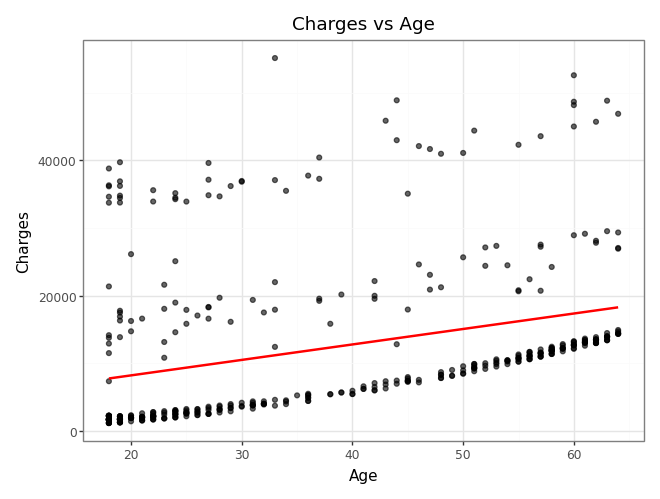

In [43]:
# This plot is based on age as the x and charges as the y. From this plot we can see that as age goes up the charges get larger on average.
age_plot = (
    p9.ggplot(my_data, p9.aes(x="age", y="charges"))
    + p9.geom_point(alpha=0.6)
    + p9.geom_smooth(method="lm", color="red", se=False)
    + p9.labs(
        title="Charges vs Age",
        x="Age",
        y="Charges"
    )
    + p9.theme_bw()
)
age_plot


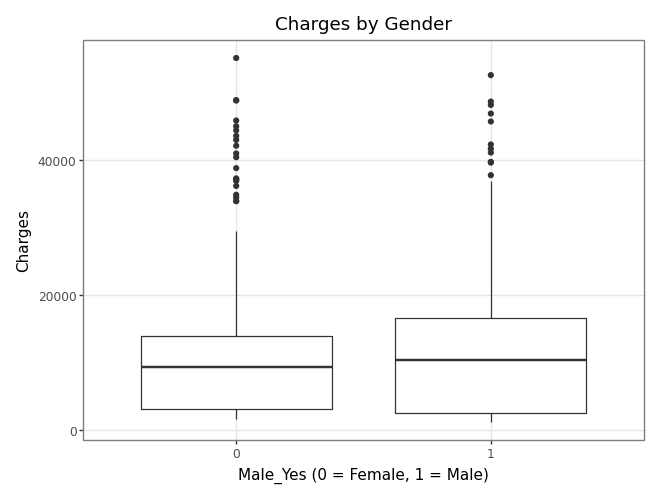

In [44]:
# This is based off male vs. female showing charges by gender and as we can see Males have larger median charges but overall the difference isn't huge.
Sex_plot = (
    p9.ggplot(my_data, p9.aes(x="factor(Male_Yes)", y="charges"))
    + p9.geom_boxplot()
    + p9.labs(
        title="Charges by Gender",
        x="Male_Yes (0 = Female, 1 = Male)",
        y="Charges"
    )
    + p9.theme_bw()
)
Sex_plot


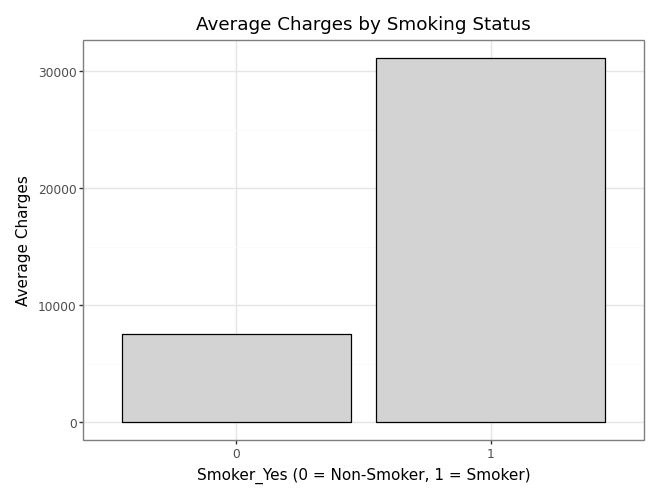

In [45]:
# I computed the mean charges by smoking status to use this dataset for my plot.
# This plot shows that people who are identified as smokers have a much larger average charge than people who do no identify as smokers.
charges_by_smoker = (
    my_data.groupby("Smoker_Yes", as_index=False)["charges"].mean()
)

# Plot
Smoke_plot = (
    p9.ggplot(charges_by_smoker, p9.aes(x="factor(Smoker_Yes)", y="charges"))
    + p9.geom_col(fill="lightgray", color="black")
    + p9.labs(
        title="Average Charges by Smoking Status",
        x="Smoker_Yes (0 = Non-Smoker, 1 = Smoker)",
        y="Average Charges"
    )
    + p9.theme_bw()
)
Smoke_plot


# Part 2: Simple Linear Models

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


knn = KNeighborsRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor()

In [47]:
# First predictor variable will be age.
y = my_data['charges']
X = my_data[['age']]

age_model = lr.fit(X,y)
# Calculate R squared
r_squared = age_model.score(X, y)
#Calculate the coefficient
coefficients = age_model.coef_
#Calculate the intercept
intercept = age_model.intercept_
# Calculate Mean Squared Error (MSE)
y_pred = age_model.predict(X)
mse_age = mean_squared_error(y, y_pred)

#Printing them all to see
print(f"R-squared: {r_squared}")
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Mean Squared Error: {mse_age}")

# As far as model fit goes as we can see our R-Squared is very low showing that there is not much variability explained in charges by age.
# As we can see when age is 0 our expected charges would be 3600 which isn't very interpretable because you obviously wouldn't have charges at 0.
# Our coefficinet of 228.8 shows that for each 1 unit increase in age we expect about a 228.8 increase in charges.


R-squared: 0.09938105452062707
Coefficients: [228.79904937]
Intercept: 3611.7587985071077
Mean Squared Error: 126739267.91026388


In [48]:
from sklearn.metrics import mean_squared_error

# Model with age and sex
y = my_data['charges']
X = my_data[['age','Male_Yes']]

age_sex_model = lr.fit(X, y)

# Calculating R-squared
r_squared_age_sex = age_sex_model.score(X, y)

# Calculating coefficients and intercept
coefficients = age_sex_model.coef_
intercept = age_sex_model.intercept_

# Calculating MSE
y_pred = age_sex_model.predict(X)
mse_age_sex = mean_squared_error(y, y_pred)

# Printing results
print(f"R-squared: {r_squared_age_sex}")
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Mean Squared Error: {mse_age_sex}")


# We still aren't seeing a ton of variation explained by our two predictor variabels yet as our R-squared is still around 10%.
# Our intercept again is difficult to interpret as we age = 0 is not a real situation.
# Our coefficient for age is the same however, now with our other coefficient for Male, if the person is a male we will predict their charges to be 650 higher, and female is our baseline so to predict female we would just use the intercept and age coefficient.

R-squared: 0.10012952499706396
Coefficients: [228.42586236 649.83258997]
Intercept: 3315.3323465342655
Mean Squared Error: 126633939.67937087


In [49]:

# Model with age and smoker
y = my_data['charges']
X = my_data[['age','Smoker_Yes']]

age_smoker_model = lr.fit(X, y)

# Calculating R-squared
r_squared_age_smoker = age_smoker_model.score(X, y)

# Calculating coefficients and intercept
coefficients = age_smoker_model.coef_
intercept = age_smoker_model.intercept_

# Calculating mean square error
y_pred = age_smoker_model.predict(X)
mse_age_smoker = mean_squared_error(y, y_pred)

#Printing results
print(f"R-squared: {r_squared_age_smoker}")
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Mean Squared Error: {mse_age_smoker}")


# First off our R-squared is much larger, meaning with smoker and age as predictors we explain around 76% of the variation in charges.
# Our intercept is now negative but still can't be directly interpreted.
# However, our coefficient for the smoker predictor is extremely large at 24000 meaning if we are predicting for a smoker we would predict an extra 24000 in charges.

R-squared: 0.7603842948069404
Coefficients: [  253.14535549 24048.86743795]
Intercept: -2166.852295375429
Mean Squared Error: 33719831.46524373


In [50]:
print(f"Mean Squared Error Smoke/Age: {mse_age_smoker}")
print(f"R-squared Smoke/Age: {r_squared_age_smoker}")
print(f"Mean Squared Error Sex/Age: {mse_age_sex}")
print(f"R-squared Sex/Age: {r_squared_age_sex}")

# Between these two models Age + smoker provides a much better fit. First of all it has a much larger R-Squared
# explaining almost 66% more of the variation in charges compared to sex + age and it also has a much
# smaller mean squared error showing smoking status is a much stronger predictor of insurance charges than sex is.

Mean Squared Error Smoke/Age: 33719831.46524373
R-squared Smoke/Age: 0.7603842948069404
Mean Squared Error Sex/Age: 126633939.67937087
R-squared Sex/Age: 0.10012952499706396


# Part Three: Multiple Linear Models

In [51]:

# Model with age and bmi
y = my_data['charges']
X = my_data[['age','bmi']]

age_bmi_model = lr.fit(X, y)

#vcalculating R-squared
r_squared_age_bmi = age_bmi_model.score(X, y)

# Calculating coefficients and intercept
coefficients = age_bmi_model.coef_
intercept = age_bmi_model.intercept_

# Calculating mse
y_pred = age_bmi_model.predict(X)
mse_age_bmi = mean_squared_error(y, y_pred)

# Printing results
print(f"R-squared: {r_squared_age_bmi}")
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Mean Squared Error: {mse_age_bmi}")
print(f"Mean Squared Error with just age: {mse_age}")

# In this case the r squared is not signficantly improved even with adding bmi as a predictor and the MSE are very similiarly large.

R-squared: 0.12032144234129338
Coefficients: [216.29721472 283.20380126]
Intercept: -4627.533445708479
Mean Squared Error: 123792439.58129103
Mean Squared Error with just age: 126739267.91026388


In [52]:
my_data["age_squared"] = my_data["age"]**2
# Model with age and age squared
y = my_data['charges']
X = my_data[['age','age_squared']]

age_age_model = lr.fit(X, y)

# Calculating R-squared
r_squared_age_age = age_age_model.score(X, y)

# Calculating coefficients and intercept
coefficients = age_age_model.coef_
intercept = age_age_model.intercept_

# Calculating mean square error
y_pred = age_age_model.predict(X)
mse_age_age = mean_squared_error(y, y_pred)

# printing results
print(f"R-squared: {r_squared_age_age}")
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Mean Squared Error: {mse_age_age}")
print(f"Mean Squared Error with just age: {mse_age}")

#The model including both doesn't provide any significant improvement over the simple age model.
#The r squared and MSE improve very slightly indicating that the relationship between age and charges may be linear.


R-squared: 0.09958694669946933
Coefficients: [308.42816984  -1.00150889]
Intercept: 2299.7305687267035
Mean Squared Error: 126710293.80956802
Mean Squared Error with just age: 126739267.91026388


In [53]:
from sklearn.preprocessing import PolynomialFeatures

# Using a degree 4 polynommial model
poly4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly4 = poly4.fit_transform(my_data[['age']])

# fitting the model
age_poly4_model = lr.fit(X_poly4, my_data['charges'])

# Finding the r squared and mse
y_pred4 = age_poly4_model.predict(X_poly4)
r_squared_4 = age_poly4_model.score(X_poly4, my_data['charges'])
mse_4 = mean_squared_error(my_data['charges'], y_pred4)


print(f"R-squared: {r_squared_4}")
print(f"Mean Squared Error: {mse_4}")

# In the polynomial model of degree 4 the r-squared is higher and MSE is lower than our linear and quadratic models but again not by an extremely significant amount meaning the model is not providing signficantly better predictions.

R-squared: 0.10782931453183642
Mean Squared Error: 125550389.64569847


In [54]:
# Using a Degree 12 polynomial
poly12 = PolynomialFeatures(degree=12, include_bias=False)
X_poly12 = poly12.fit_transform(my_data[['age']])

# Fitting the model
age_poly12_model = lr.fit(X_poly12, my_data['charges'])

# Finding r squared and mse
y_pred12 = age_poly12_model.predict(X_poly12)
r_squared_12 = age_poly12_model.score(X_poly12, my_data['charges'])
mse_12 = mean_squared_error(my_data['charges'], y_pred12)

print(f"Degree 12 Polynomial")
print(f"R-squared: {r_squared_12}")
print(f"Mean Squared Error: {mse_12}")

# For the 12th degree polynomial model our r-squared become lower and MSE went up from the fourth degree meaning this model is a worse predictor and we would rather use the fourth degree.

Degree 12 Polynomial
R-squared: 0.10734541968547395
Mean Squared Error: 125618485.56893146


According to the MSE and R-squared the model that is the best is the fourth degree polynomial however in real practice I wouldn't agree this is the "best" model because it does not justify the extra complexity needed with only a marginal increase in the variation of charges explained. Because of this I would probably go with the simple linear model that is much easier to interpret.

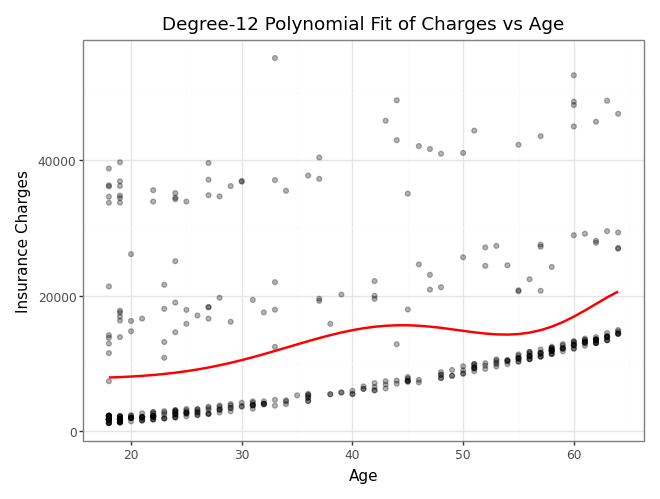

In [55]:
from sklearn.preprocessing import PolynomialFeatures

# _Predicting based off the 12th polynomial model
y_pred12 = age_poly12_model.predict(X_poly12)

# Creating a line for plotting based by age
my_data_predict = my_data.copy()
my_data_predict['predicted_charges'] = y_pred12
my_data_predict = my_data_predict.sort_values(by='age')

# Plotting our original scatter plus the new fitted linewe created.
(
    p9.ggplot(my_data_predict, p9.aes(x='age', y='charges'))
    + p9.geom_point(alpha=0.3)
    + p9.geom_line(p9.aes(y='predicted_charges'), color='red', size=1)
    + p9.labs(
        title="Degree-12 Polynomial Fit of Charges vs Age",
        x="Age",
        y="Insurance Charges"
    )
    + p9.theme_bw()
)


# Part Four: New Data

In [56]:
my_data_new = pd.read_csv("C:/Users/mason/OneDrive/Desktop/GSB_544_Labs/Data/insurance_costs_1.csv")
my_data_new.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [57]:
my_data_new['Smoker_Yes'] = my_data_new['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
my_data_new['Male_Yes'] = my_data_new['sex'].apply(lambda x: 1 if x == 'male' else 0)
my_data_new = pd.get_dummies(my_data_new, columns=["region"])
my_data_new.head()

,age,sex,bmi,smoker,charges,Smoker_Yes,Male_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,yes,16884.92400,1,0,False,False,False,True
1,33,male,22.705,no,21984.47061,0,1,False,True,False,False
2,32,male,28.880,no,3866.85520,0,1,False,True,False,False
3,31,female,25.740,no,3756.62160,0,0,False,False,True,False
4,60,female,25.840,no,28923.13692,0,0,False,True,False,False


In [58]:
#Model 1 with age as predictor.
X_train = my_data[['age']]
y_train = my_data['charges']
X_test  = my_data_new[['age']]
y_test  = my_data_new['charges']

lr.fit(X_train, y_train)
preds = lr.predict(X_test)
mse_age_new = mean_squared_error(y_test, preds)

print(f"Model 1 MSE: {mse_age_new}")


Model 1 MSE: 126739267.91026388


In [59]:
#MOdel 2 using age and bmi as predicotrs.
X_train = my_data[['age', 'bmi']]
y_train = my_data['charges']
X_test  = my_data_new[['age', 'bmi']]
y_test  = my_data_new['charges']

lr.fit(X_train, y_train)
preds = lr.predict(X_test)
mse_age_bmi_new = mean_squared_error(y_test, preds)

print(f"Model 2 MSE: {mse_age_bmi_new}")


Model 2 MSE: 123792439.58129103


In [60]:
#Model 3 using age, bmi, and smoker as predictors.
X_train = my_data[['age', 'bmi', 'Smoker_Yes']]
y_train = my_data['charges']
X_test  = my_data_new[['age', 'bmi', 'Smoker_Yes']]
y_test  = my_data_new['charges']

lr.fit(X_train, y_train)
preds = lr.predict(X_test)
mse_age_bmi_smoker_new = mean_squared_error(y_test, preds)
print(f"Model 3 MSE: {mse_age_bmi_smoker_new}")

Model 3 MSE: 30812111.9406528


In [61]:
#Model 4 using age, bmi, and the interactions between age/smoke and bmi/smoke

# Here I created the interaction affects columns between age and bmi with smoker for both my old and new datasets
my_data['age_smoke'] = my_data['age'] * my_data['Smoker_Yes']
my_data['bmi_smoke'] = my_data['bmi'] * my_data['Smoker_Yes']
my_data_new['age_smoke'] = my_data_new['age'] * my_data_new['Smoker_Yes']
my_data_new['bmi_smoke'] = my_data_new['bmi'] * my_data_new['Smoker_Yes']

X_train = my_data[['age', 'bmi', 'age_smoke', 'bmi_smoke']]
y_train = my_data['charges']
X_test  = my_data_new[['age', 'bmi', 'age_smoke', 'bmi_smoke']]
y_test  = my_data_new['charges']

lr.fit(X_train, y_train)
preds = lr.predict(X_test)
mse_interact_add_new = mean_squared_error(y_test, preds)
print(f"Model 4 MSE: {mse_interact_add_new}")

Model 4 MSE: 20773858.810472343


In [62]:
#Model 5 using all predicotrs: age, bmi, smoker, and age/smoke and bmi/smoke interaction variables
X_train = my_data[['age', 'bmi', 'Smoker_Yes', 'age_smoke', 'bmi_smoke']]
y_train = my_data['charges']
X_test  = my_data_new[['age', 'bmi', 'Smoker_Yes', 'age_smoke', 'bmi_smoke']]
y_test  = my_data_new['charges']

lr.fit(X_train, y_train)
preds = lr.predict(X_test)
mse_interact_full_new = mean_squared_error(y_test, preds)
print(f"Model 5 MSE: {mse_interact_full_new}")

Model 5 MSE: 18674284.77468444


In [63]:
# Outputing all model MSE's to see which one is the smallest
print(f"Model 1 (Age only) MSE: {mse_age_new}")
print(f"Model 2 (Age + BMI) MSE: {mse_age_bmi_new}")
print(f"Model 3 (Age + BMI + Smoker) MSE: {mse_age_bmi_smoker_new}")
print(f"Model 4 ((Age + BMI):Smoker) MSE: {mse_interact_add_new}")
print(f"Model 5 ((Age + BMI)*Smoker) MSE: {mse_interact_full_new}")

Model 1 (Age only) MSE: 126739267.91026388
Model 2 (Age + BMI) MSE: 123792439.58129103
Model 3 (Age + BMI + Smoker) MSE: 30812111.9406528
Model 4 ((Age + BMI):Smoker) MSE: 20773858.810472343
Model 5 ((Age + BMI)*Smoker) MSE: 18674284.77468444


Based on these results, the model with the lowest MSE is model 5 with the 3 predictors age, bmi, smoker and the 2 interactions age/smoke and bmi/smoke. In some cases we would potentially look at model complexity and how difficult the model is however our model 5 is only moderately complex and is definitely usable especially with that much lower of a MSE.

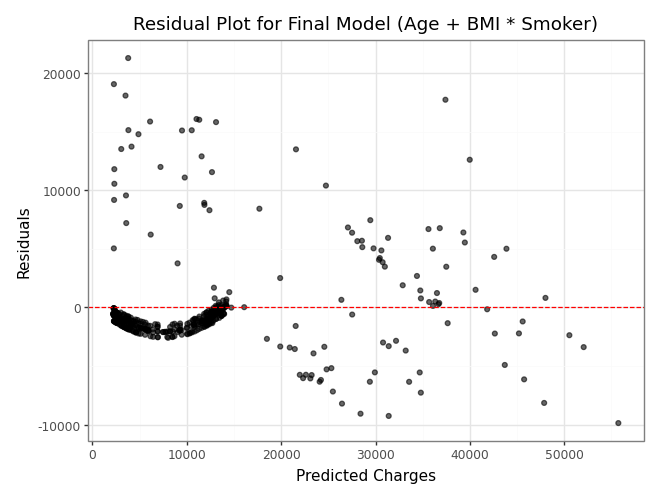

In [64]:
from plotnine import ggplot, aes, geom_point, geom_hline, labs, theme_bw

#Predictions and residuals from final model
X_test = my_data_new[['age', 'bmi', 'Smoker_Yes', 'age_smoke', 'bmi_smoke']]
y_test = my_data_new['charges']
y_pred = lr.predict(X_test)

#Calculating the residuals
residuals = y_test - y_pred

#Creating a dataframe for plotting
my_data_residual = pd.DataFrame({
    'Predicted': y_pred,
    'Residuals': residuals
})

# I created gg residual plot using geom_point
(
    ggplot(my_data_residual, aes(x='Predicted', y='Residuals'))
    + geom_point(alpha=0.6)
    #Chat suggested geom_hline when I asked what the best methods of creating a residual plot in ggplots was.
    + geom_hline(yintercept=0, color='red', linetype='dashed')
    + labs(
        title='Residual Plot for Final Model (Age + BMI * Smoker)',
        x='Predicted Charges',
        y='Residuals'
    )
    + theme_bw()
)


# Part Five: Full Exploration

Attempt at best Model MSE: 18529752.35474254


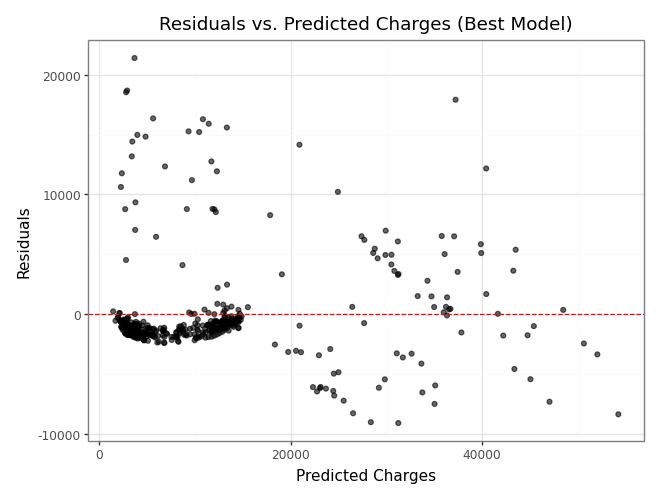

In [65]:
# To attempt to find the best model I first asked chatgpt what it believed to be the best potential combo
# It explained that it believed the best possible MSE would come from using age, bmi, smoker and then quadratics for age and bmi as well as interactions effects between age/bmi and smoker


# First I did the polynomial transformations for age and bmi
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(my_data[['age', 'bmi']])
X_test_poly  = poly.transform(my_data_new[['age', 'bmi']])


#Then I created the interaction effects for my old and new data again
my_data['age_smoke'] = my_data['age'] * my_data['Smoker_Yes']
my_data['bmi_smoke'] = my_data['bmi'] * my_data['Smoker_Yes']
my_data_new['age_smoke'] = my_data_new['age'] * my_data_new['Smoker_Yes']
my_data_new['bmi_smoke'] = my_data_new['bmi'] * my_data_new['Smoker_Yes']

# Then I created my training and test data for the x variable
# I was having a hard time putting the data altogether, but chat suggested this np.column_stack function that puts the arrays together in a column stack
X_train = np.column_stack([X_train_poly, my_data[['Smoker_Yes', 'age_smoke', 'bmi_smoke']]])
X_test  = np.column_stack([X_test_poly, my_data_new[['Smoker_Yes', 'age_smoke', 'bmi_smoke']]])


y_train = my_data['charges']
y_test = my_data_new['charges']

#fitting and predicting on the data
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#Computing the MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Attempt at best Model MSE: {mse}")


# Calculating residuals
residuals = y_test - y_pred

# Creating DataFrame for plotting
residual_plot = pd.DataFrame({
    'Predicted': y_pred,
    'Residuals': residuals
})

# Created similar residual plot to the one in question 4 with ggplot
(
    ggplot(residual_plot, aes(x='Predicted', y='Residuals'))
    + geom_point(alpha=0.6)
    + geom_hline(yintercept=0, color='red', linetype='dashed')
    + labs(
        title='Residuals vs. Predicted Charges (Best Model)',
        x='Predicted Charges',
        y='Residuals'
    )
    + theme_bw()
)



So far, this is the best MSE I have seen out of any of my models.

In [66]:
# I wanted to try a model using sex as well even though we found earlier that it wasn't very helpful as a predictor
# Here I created interaction variables for age and sex as well as bmi and sex
my_data['age_male'] = my_data['age'] * my_data['Male_Yes']
my_data['bmi_male'] = my_data['bmi'] * my_data['Male_Yes']
my_data_new['age_male'] = my_data_new['age'] * my_data_new['Male_Yes']
my_data_new['bmi_male'] = my_data_new['bmi'] * my_data_new['Male_Yes']

# Then I combined all the data using np.column_stack again
X_train_final = np.column_stack([
    X_train_poly, my_data[['Smoker_Yes', 'age_smoke', 'bmi_smoke', 'Male_Yes', 'age_male', 'bmi_male']]])
X_test_final = np.column_stack([
    X_test_poly, my_data_new[['Smoker_Yes', 'age_smoke', 'bmi_smoke', 'Male_Yes', 'age_male', 'bmi_male']]])

#Then finally I fet and tested it
lr.fit(X_train_final, y_train)
y_pred_final = lr.predict(X_test_final)
mse_final_full = mean_squared_error(y_test, y_pred_final)

print(f"MSE: {mse_final_full}")


MSE: 18443817.02928298


This MSE ended up being larger even though I added sex into the equation which led me to keep the other as my best model prediciton.